In [35]:
%matplotlib inline

import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from score import Audio
from utils import FMA, min_max_scaling


## Prepairng data

In [3]:
fma = FMA()
tracks = fma.load('data/fma_metadata/tracks.csv')
genres = fma.load('data/fma_metadata/genres.csv')
features = fma.load('data/fma_metadata/features.csv')

In [97]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = fma.train_data('medium')
X_train.shape, X_val.shape, X_test.shape

((19922, 140), (2505, 140), (2573, 140))

## Models

In [123]:
def show_loss(hist):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Loss Over Time', fontsize=20)

    ax[0].plot(hist.history['loss'], label='Training Loss')
    ax[0].set
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(hist.history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [126]:
def show_tsne(Y, encoder: models.Model):
    le = LabelEncoder()
    le.fit(Y)
    Y = le.transform(Y)
    print(np.unique(Y).shape)

    encoded_features = encoder.predict(X_test)
    tsne = TSNE(n_components=2)
    encoded_2d = tsne.fit_transform(encoded_features.reshape(-1, 20))

    plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=Y, cmap='inferno', alpha=1)
    plt.title('2D Visualization of Encoded Features')
    plt.colorbar()
    plt.show()

### Model 1
1. Dense 128
2. Dense 64
3. Dense 64
4. Dense 32
5. Dense 20

In [131]:
def model_1():
    input_dim = 140
    encoding_dim = 20
    
    input_layer = layers.Input(shape = (input_dim, ))
    x = layers.Masking(0.)(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

#### Model 1.1

In [137]:
encoder, autoencoder = model_1()
# autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
hist = autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=50, batch_size=32, verbose=1)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_10 (Masking)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        18,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 140)            │         2,940 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,144 (141.19 KB)

 Trainable params: 36,144 (141.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 4059.9426 - val_loss: 4038.4065
Epoch 2/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 4064.7183 - val_loss: 4036.3394
Epoch 3/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 4061.7773 - val_loss: 4036.3318
Epoch 4/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4061.7588 - val_loss: 4036.3311
Epoch 5/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 4068.6721 - val_loss: 4036.3301
Epoch 6/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 4069.7773 - val_loss: 4036.3301
Epoch 7/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 4043.3562 - val_loss: 4036.3293
Epoch 8/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 4052.2222 - val_loss: 4036.3162
Epoch 9/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 4057.5696 - val_loss: 4035.8147
Epoch 10/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 4066.5061 - val_loss: 4035.8147
Epoch 11/50
623/623 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - lo

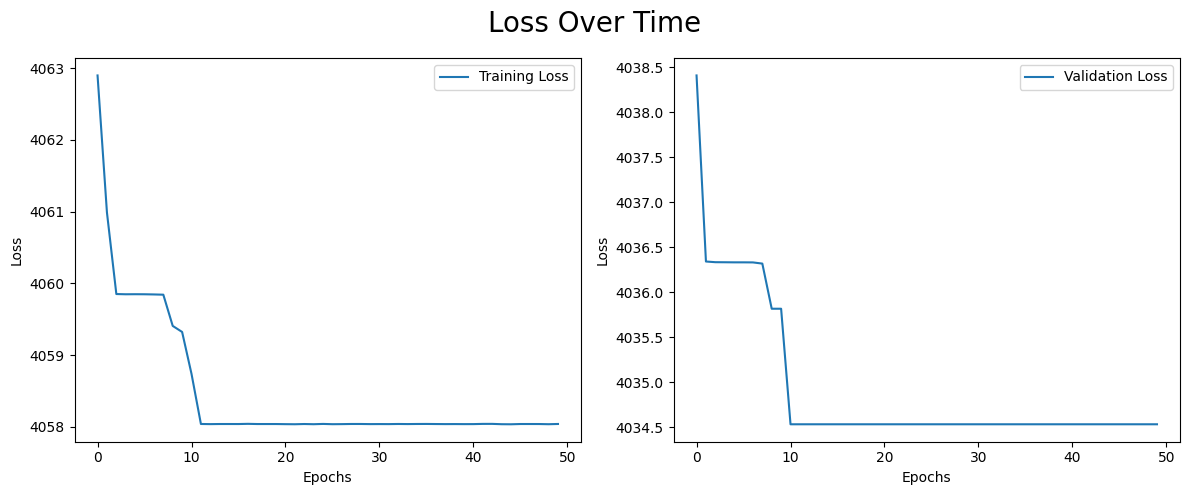

In [138]:
show_loss(hist)

(16,)
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


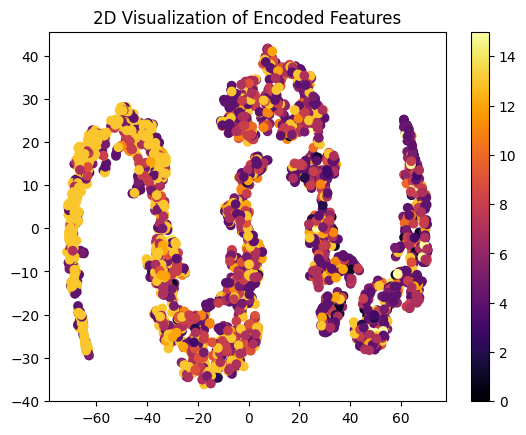

In [139]:
show_tsne(Y_test, encoder=encoder)

#### Model 1.2

In [140]:
encoder, autoencoder = model_1()
autoencoder.compile(optimizer='adam', loss='mse')
hist = autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4078.5742 - val_loss: 4046.4922
Epoch 2/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 4054.9514 - val_loss: 4042.5090
Epoch 3/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 4072.4978 - val_loss: 4032.6812
Epoch 4/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 4052.7654 - val_loss: 4032.6084
Epoch 5/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 4044.5171 - val_loss: 4032.5557
Epoch 6/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 4052.3325 - val_loss: 4032.5234
Epoch 7/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 4053.7625 - val_loss: 4032.4719
Epoch 8/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 4051.4375 - val_loss: 4032.4600
Epoch 9/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 4044.8887 - val_loss: 4032.4280
Epoch 10/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 4046.8442 - val_loss: 4032.4104
Epoch 11/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss

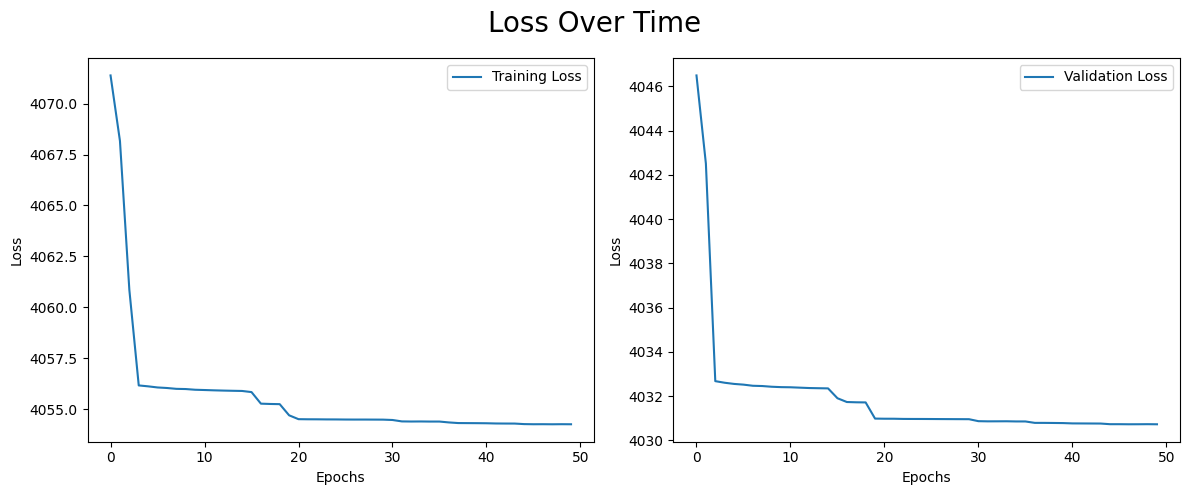

In [141]:
show_loss(hist)

(16,)
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


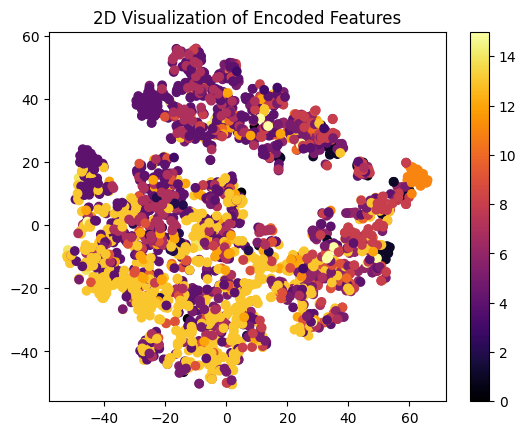

In [143]:
show_tsne(Y_test, encoder=encoder)

#### Model 1.3

In [147]:
encoder, autoencoder = model_1()
autoencoder.compile(optimizer='adam', loss='mse')
hist = autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - loss: 4046.6699 - val_loss: 4031.0234
Epoch 2/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 4062.3496 - val_loss: 4030.9868
Epoch 3/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - loss: 4059.8918 - val_loss: 4030.9509
Epoch 4/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 4053.6477 - val_loss: 4030.8989
Epoch 5/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - loss: 4064.0281 - val_loss: 4030.8672
Epoch 6/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 4047.5244 - val_loss: 4030.8276
Epoch 7/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 4053.7920 - val_loss: 4030.8044
Epoch 8/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 4046.5608 - val_loss: 4030.7944
Epoch 9/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 4052.8535 - val_loss: 4030.7913
Epoch 10/50
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 4047.7273 - val_loss: 4030.7812
Epoch 11/50
1246/1246 ━━━━━━━━━━━━━━━━━

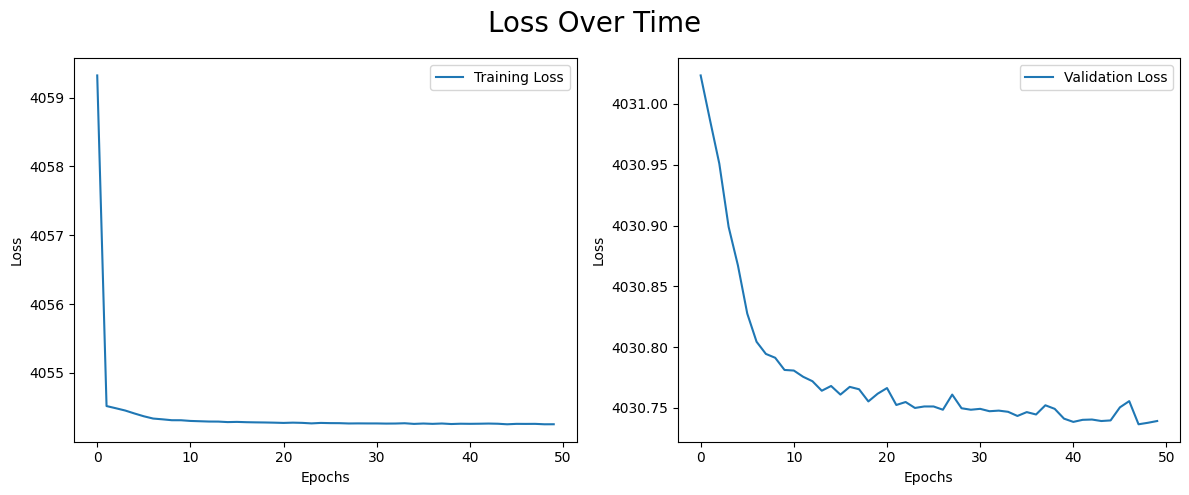

In [148]:
show_loss(hist)

(16,)
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


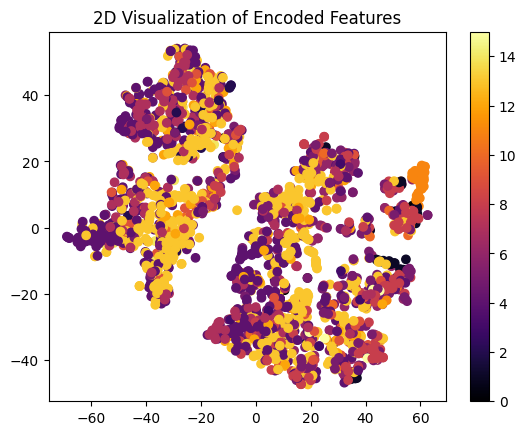

In [149]:
show_tsne(Y_test, encoder=encoder)

## Features

In [152]:
def get_features(path: str):
    audio = Audio(path)
    _, _, stats = audio.get_mfcc()
    data = np.array(stats)
    data.shape
    data = data.reshape((1, 140))
    features_reduced = encoder.predict(data)
    features_reduced = features_reduced.flatten()
    features_reduced = min_max_scaling(features_reduced)
    return features_reduced

In [153]:
fs = [
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\4n9Ie3ac6BM.mp3"),
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\eMp0OK1q7C0.mp3"),
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\xRJeEcby-Pw.mp3")
]
print([i.shape for i in fs])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[(20,), (20,), (20,)]


In [25]:
for i in fs:
    print(i)

[0.17203812 0.26977077 0.01244758 1.         0.71225643 0.
 0.         0.96248263]
[0.17364566 0.27036193 0.01205664 1.         0.7122157  0.
 0.         0.9640003 ]
[0.17129353 0.2706598  0.01233452 1.         0.7109704  0.
 0.         0.95909685]


In [154]:
print(cosine_similarity(fs))

[[1.0000001  0.9999293  0.9996614 ]
 [0.9999293  0.99999994 0.99969256]
 [0.9996614  0.99969256 1.0000001 ]]
